 # **COVID19 Data Modeling Analysis and Death Prediction**



We are living in an era where we’re continuously generating the different forms of data throughout the day after the introduction of computers. The technology advancement and adoption of IOT will be making exponential data growth across different business domains. Over the last two years alone 90 percent of the data in the world was generated. As big data expands into AI and machine learning, its scope is very vast and, for any business data analysis is very important because it helps in decision making as well as provides explanation to important concepts and problems. Also we can find solution of various difficult real life problems. Scientists around the world develop algorithms that can help to predict infections based on that data.


 <a id="section-9"></a>

# REFERENCES

https://machinelearningmastery.com/handle-missing-data-python/

https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

https://matplotlib.org/basemap/users/examples.html

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions#2.-SIR-model-

https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

https://www.youtube.com/watch?v=NKMHhm2Zbkw

https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html?fbclid=IwAR2t1lhNhmZOHB_DHf2Tvy3rDOjsr-W7uCJE8GaodRjmLv1oxjV5cKpZ4o8


 <a id="section-1"></a>
 #  INTRODUCTION 

The world is going through a difficult time and fighting with a deadly virus called COVID-19. Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, China, and has resulted in an ongoing pandemic. The first case may be traced back to 17 November 2019.As of 8 June 2020, more than 7.06 million cases have been reported across 188 countries and territories, resulting in more than 403,000 deaths. More than 3.16 million people have recovered. (Wikipedia) As a data scientist it’s our duty is to do good for our society, and I believe we can get through it. The objective of the project is to use the COVID-19 data from CSSE at Johns Hopkins University and Our World in Data. Explored and analyzed the data using python, created visualizations. Also build Prophet, SIR, Extended SIR, linear regression and XGBoost model for death prediction.

  <a id="section-2"></a>

 # LIBRARIES

In [1]:
# Required Libraries

import numpy as np
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import time
import datetime
from datetime import datetime, date,timedelta
from scipy import integrate, optimize
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')

import os

# plotly library
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

#matplot lib
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import ticker

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing, svm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,explained_variance_score
import sklearn 
import matplotlib.dates as dates

import mpld3
mpld3.enable_notebook()
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
matplotlib.style.use('ggplot')
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

 <a id="section-3"></a>

 # DATA

In [2]:
# Data

TodaysData_Country = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
cleaned_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv')
owid_covid_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')


<a id="subsection-3.1"></a>
# Data Cleaning

In [3]:
# Data Cleaning
ColumnToClean = ['Confirmed', 'Deaths', 'Recovered', 'Active']
# filling missing values 
TodaysData_Country[['Country_Region']] = TodaysData_Country[['Country_Region']].fillna('')
TodaysData_Country[ColumnToClean] = TodaysData_Country[ColumnToClean].fillna(0)
TodaysData_Country.loc[TodaysData_Country['Country_Region'] == "United Kingdom", "Country_Region"] = "UK"

<a id="subsection-4.1"></a>
# EDA/ VISUALIZATION
# Top 10 Countries with highest Death cases 

In [4]:
# Top 10 Countries with highest Death cases
Top10_Countries_death = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Top10_Countries_death = Top10_Countries_death.nlargest(10, 'Deaths')
Top10_Countries_death.head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active
181,US,33723804.0,605567.0,0.0,0.0
23,Brazil,18792511.0,525112.0,16675561.0,1591838.0
79,India,30619932.0,403281.0,29752294.0,464357.0
115,Mexico,2541873.0,233689.0,2019048.0,289136.0
138,Peru,2066677.0,193389.0,2027878.0,-154590.0
144,Russia,5591030.0,137005.0,5042516.0,411509.0
185,UK,4947286.0,128495.0,15777.0,4803014.0
85,Italy,4263797.0,127680.0,4092586.0,43531.0
62,France,5849011.0,111385.0,406257.0,5331369.0
37,Colombia,4375861.0,109466.0,4076013.0,190382.0


<a id="subsection-4.2"></a>

# Top 10 Countries with highest number of Confirmed cases


In [5]:
# Top 10 Countries with highest number of Confirmed cases

Top10_Countries_Confirmed = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Top10_Countries_Confirmed = Top10_Countries_Confirmed.nlargest(10, 'Confirmed')
Top10_Countries_Confirmed.head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active
181,US,33723804.0,605567.0,0.0,0.0
79,India,30619932.0,403281.0,29752294.0,464357.0
23,Brazil,18792511.0,525112.0,16675561.0,1591838.0
62,France,5849011.0,111385.0,406257.0,5331369.0
144,Russia,5591030.0,137005.0,5042516.0,411509.0
180,Turkey,5440368.0,49874.0,5310769.0,79725.0
185,UK,4947286.0,128495.0,15777.0,4803014.0
6,Argentina,4552750.0,96521.0,4175856.0,280373.0
37,Colombia,4375861.0,109466.0,4076013.0,190382.0
85,Italy,4263797.0,127680.0,4092586.0,43531.0


<a id="subsection-4.3"></a>

# Top 10 Countries with highest number of Recoverd cases


In [6]:
# Top 10 Countries with highest number of Recoverd cases

Top10_Countries_Recovered = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Top10_Countries_Recovered = Top10_Countries_Recovered.nlargest(10, 'Recovered')
Top10_Countries_Recovered.head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active
79,India,30619932.0,403281.0,29752294.0,464357.0
23,Brazil,18792511.0,525112.0,16675561.0,1591838.0
180,Turkey,5440368.0,49874.0,5310769.0,79725.0
144,Russia,5591030.0,137005.0,5042516.0,411509.0
6,Argentina,4552750.0,96521.0,4175856.0,280373.0
85,Italy,4263797.0,127680.0,4092586.0,43531.0
37,Colombia,4375861.0,109466.0,4076013.0,190382.0
66,Germany,3738925.0,91068.0,3628600.0,19257.0
81,Iran,3286923.0,85095.0,2953586.0,248242.0
140,Poland,2880403.0,75095.0,2652265.0,153043.0


<a id="subsection-4.4"></a>

# Top 10 Countries with highest number of Active cases

In [7]:
# Top 10 Countries with highest number of Recoverd cases
Top10_Countries_Active = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Top10_Countries_Active = Top10_Countries_Active.nlargest(10, 'Active')
Top10_Countries_Active.head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active
62,France,5849011.0,111385.0,406257.0,5331369.0
185,UK,4947286.0,128495.0,15777.0,4803014.0
164,Spain,3866475.0,80934.0,150376.0,3635165.0
125,Netherlands,1718397.0,18040.0,27399.0,1672958.0
23,Brazil,18792511.0,525112.0,16675561.0,1591838.0
169,Sweden,1090880.0,14631.0,0.0,1076249.0
16,Belgium,1088363.0,25190.0,0.0,1063173.0
154,Serbia,716983.0,7059.0,0.0,709924.0
79,India,30619932.0,403281.0,29752294.0,464357.0
144,Russia,5591030.0,137005.0,5042516.0,411509.0


# Top 10 countries with Highest Number of Death Rates

In [8]:
# Top 10 countries with Highest Number of Death Rates
fig = px.bar(Top10_Countries_death.sort_values('Deaths',ascending=False)[:20][::-1],x='Deaths',y='Country_Region', title='Top 10 Countries with highest number of Death Cases', text='Deaths', height=400, orientation='h')

#image_bytes = fig.to_image(format='png', , width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
#img_bytes = fig.to_image(format="png")
#instead of using fig.show()
##from IPython.display import Image
#Image(img_bytes)
#fig.show()
plotly.offline.iplot(fig)


# World top 10 countries with Covid-19 Cases

In [9]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Top 10 Countries with Confirmed Cases","Top 10 Countries with Death Cases", "Top 10 Countries with Recovered Cases", "Top 10 Countries with Active Cases")
)

fig.add_trace(go.Bar(name='Confirmed',text='Confirmed', x=Top10_Countries_Confirmed['Country_Region'], y=Top10_Countries_Confirmed['Confirmed']),
              row=1, col=1)


fig.add_trace(go.Bar(name='Deaths',text='Deaths', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Deaths']),
              row=1, col=2)

fig.add_trace(go.Bar(name='Recovered', text='Recovered',x=Top10_Countries_Active['Country_Region'], y=Top10_Countries_Active['Recovered']),
              row=2, col=1)

fig.add_trace(go.Bar(name='Active',text='Active', x=Top10_Countries_Recovered['Country_Region'], y=Top10_Countries_Recovered['Active']),
              row=2, col=2)

fig.update_layout(height=500,title_text="World top 10 countries with Covid-19 Cases", showlegend=False)

#fig.show()
plotly.offline.iplot(fig)


# Top 10 Countries with Confirmed Death and Recovered

In [10]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Confirmed']),
     go.Bar(name='Deaths', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Deaths']),
     go.Bar(name='Recovered', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Recovered']),
    go.Bar(name='Active', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Active'])
])
# Change the bar mode
fig.update_layout(barmode='group')
#fig.show()
plotly.offline.iplot(fig)


# Spread Over Time

In [11]:
'''formated_gdf = cleaned_data.groupby(['Report_Date_String', 'Country_Region'])['Confirmed'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Report_Date_String'] = pd.to_datetime(formated_gdf['Report_Date_String'])
formated_gdf['Report_Date_String'] = formated_gdf['Report_Date_String'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country_Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country_Region", 
                     range_color= [0, 1500], 
                     projection="natural earth", animation_frame="Report_Date_String", 
                     title='COVID-19: Spread Over Time', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
#fig.show()
plotly.offline.iplot(fig)
'''

'formated_gdf = cleaned_data.groupby([\'Report_Date_String\', \'Country_Region\'])[\'Confirmed\'].max()\nformated_gdf = formated_gdf.reset_index()\nformated_gdf[\'Report_Date_String\'] = pd.to_datetime(formated_gdf[\'Report_Date_String\'])\nformated_gdf[\'Report_Date_String\'] = formated_gdf[\'Report_Date_String\'].dt.strftime(\'%m/%d/%Y\')\nformated_gdf[\'size\'] = formated_gdf[\'Confirmed\'].pow(0.3)\n\nfig = px.scatter_geo(formated_gdf, locations="Country_Region", locationmode=\'country names\', \n                     color="Confirmed", size=\'size\', hover_name="Country_Region", \n                     range_color= [0, 1500], \n                     projection="natural earth", animation_frame="Report_Date_String", \n                     title=\'COVID-19: Spread Over Time\', color_continuous_scale="portland")\n# fig.update(layout_coloraxis_showscale=False)\n#fig.show()\nplotly.offline.iplot(fig)\n'

# New Cases/ New Deaths

In [12]:
owid_covid_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
owid_covid_data_Selected = owid_covid_data[['date','new_cases','new_deaths']]
#Set 0 for NAN
#ColumnNan = ['new_cases','new_deaths']
#owid_covid_data_Selected[ColumnNan] = owid_covid_data_Selected[ColumnNan].fillna(0)
owid_covid_data_Selected.tail()
#owid_covid_data.head()
# W weekly frequency

,date,new_cases,new_deaths
100440,2021-07-01,1357.0,19.0
100441,2021-07-02,1442.0,33.0
100442,2021-07-03,1002.0,18.0
100443,2021-07-04,809.0,19.0
100444,2021-07-05,1540.0,33.0


 # Groupby Date New Deaths

In [13]:
owid_covid_newcases = owid_covid_data_Selected.groupby(['date'])['new_cases'].sum()
owid_covid_newcases = owid_covid_newcases.reset_index()
owid_covid_newcases['date'] = pd.to_datetime(owid_covid_newcases['date'])
owid_covid_newcases['date'] = owid_covid_newcases['date'].dt.strftime('%m/%d/%Y')
owid_covid_newcases.head()


,date,new_cases
0,01/01/2020,0.0
1,01/02/2020,0.0
2,01/03/2020,0.0
3,01/04/2020,0.0
4,01/05/2020,0.0


In [14]:
owid_covid_newdeaths = owid_covid_data_Selected.groupby(['date'])['new_deaths'].sum()
owid_covid_newdeaths = owid_covid_newdeaths.reset_index()
owid_covid_newdeaths['date'] = pd.to_datetime(owid_covid_newdeaths['date'])
owid_covid_newdeaths['date'] = owid_covid_newdeaths['date'].dt.strftime('%m/%d/%Y')
owid_covid_newdeaths.head()

,date,new_deaths
0,01/01/2020,0.0
1,01/02/2020,0.0
2,01/03/2020,0.0
3,01/04/2020,0.0
4,01/05/2020,0.0


# TrendLine - World Death and new cases over the time

In [15]:
fig = go.Figure(data=[
    go.Line(x=owid_covid_newcases['date'], y=owid_covid_newcases['new_cases'],mode='lines',name='New Case'),
     go.Line(x=owid_covid_newdeaths['date'], y=owid_covid_newdeaths['new_deaths'],mode='lines',name='Death'),
])

fig.update_layout(
    title="TrendLine - World Death and new cases over the time",
    yaxis_title="New or Death Cases",
    xaxis_title="Date",
    showlegend=True
)
#fig.show()
plotly.offline.iplot(fig)


C:\Users\Sanya\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




<a id="subsection-4.11"></a>

* * # Top 10 cvd_death_rate

In [16]:
Top10_Countries = Top10_Countries_death[['Country_Region']]
Top10_Countries.loc[Top10_Countries['Country_Region'] == "UK", "Country_Region"] = "United Kingdom"
Top10_Countries.loc[Top10_Countries['Country_Region'] == "US", "Country_Region"] = "United States"
filter_list = Top10_Countries['Country_Region']. values. tolist()
owid_Top10_Countries = owid_covid_data.loc[owid_covid_data['location'].isin(filter_list)]

Top10_gdp_per_capita =  owid_Top10_Countries.groupby(['location'])['gdp_per_capita'].max().to_frame(name = 'gdp_per_capita').reset_index()
Top10_cvd_death_rate =  owid_Top10_Countries.groupby(['location'])['total_deaths'].max().to_frame(name = 'total_deaths').reset_index()
Top10_diabetes_prevalence =  owid_Top10_Countries.groupby(['location'])['diabetes_prevalence'].max().to_frame(name = 'diabetes_prevalence').reset_index()
Top10_female_smokers =  owid_Top10_Countries.groupby(['location'])['female_smokers'].max().to_frame(name = 'female_smokers').reset_index()
Top10_male_smokers =  owid_Top10_Countries.groupby(['location'])['male_smokers'].max().to_frame(name = 'male_smokers').reset_index()
Top10_hospital_beds_per_100k =  owid_Top10_Countries.groupby(['location'])['hospital_beds_per_thousand'].max().to_frame(name = 'hospital_beds_per_100k').reset_index()

Top10_cvd_death_rate.head()

,location,total_deaths
0,Brazil,525112.0
1,Colombia,109466.0
2,France,111360.0
3,India,403281.0
4,Italy,127680.0


<a id="subsection-4.12"></a>

* * # Bottom 10 gdp_per_capita


In [17]:
Bottom10_Countries_death = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Bottom10_Countries_death = Bottom10_Countries_death.loc[(Bottom10_Countries_death['Deaths'] >= 1)].nsmallest(10, 'Deaths')
Bottom10_Countries_death.head(10)
Bottom10_Countries = Bottom10_Countries_death[['Country_Region']]
Bottom10_Countries.loc[Bottom10_Countries['Country_Region'] == "UK", "Country_Region"] = "United Kingdom"
Bottom10_Countries.loc[Bottom10_Countries['Country_Region'] == "US", "Country_Region"] = "United States"
filter_list = Bottom10_Countries['Country_Region']. values. tolist()
owid_Bottom10_Countries = owid_covid_data.loc[owid_covid_data['location'].isin(filter_list)]

Bottom10_gdp_per_capita =  owid_Bottom10_Countries.groupby(['location'])['gdp_per_capita'].max().to_frame(name = 'gdp_per_capita').reset_index()
Bottom10_cvd_death_rate =  owid_Bottom10_Countries.groupby(['location'])['total_deaths'].max().to_frame(name = 'total_deaths').reset_index()
Bottom10_diabetes_prevalence =  owid_Bottom10_Countries.groupby(['location'])['diabetes_prevalence'].max().to_frame(name = 'diabetes_prevalence').reset_index()
Bottom10_female_smokers =  owid_Bottom10_Countries.groupby(['location'])['female_smokers'].max().to_frame(name = 'female_smokers').reset_index()
Bottom10_male_smokers =  owid_Bottom10_Countries.groupby(['location'])['male_smokers'].max().to_frame(name = 'male_smokers').reset_index()
Bottom10_hospital_beds_per_100k =  owid_Bottom10_Countries.groupby(['location'])['hospital_beds_per_thousand'].max().to_frame(name = 'hospital_beds_per_100k').reset_index()
Bottom10_gdp_per_capita.head(10)

,location,gdp_per_capita
0,Bhutan,8708.597
1,Brunei,71809.251
2,Burundi,702.225
3,Grenada,13593.877
4,Laos,6397.360
5,Saint Kitts and Nevis,24654.385
6,Saint Vincent and the Grenadines,10727.146
7,Vanuatu,2921.909


<a id="subsection-4.13"></a>

* * # Comaprison - COVID Death Cases


In [18]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Top 10 Countries with Death Cases","Bottom 10 Countries with Death Cases")
)

fig.add_trace(go.Bar(name='Deaths',text='Deaths', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Deaths']),
              row=1, col=1)

fig.add_trace(go.Bar(name='Deaths',text='Deaths', x=Bottom10_Countries_death['Country_Region'], y=Bottom10_Countries_death['Deaths']),
              row=1, col=2)
fig.update_layout(height=500,title_text="Comaprison - COVID Death Cases", showlegend=False)

#fig.show()
plotly.offline.iplot(fig)


<a id="subsection-4.14"></a>

* * # Comaprison - Top 10 Countries with Death Cases VS Bottom 10


In [19]:
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}],
            [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("GDP" ,"Diabetes Prevalence", "Female smokers", "Male smokers","Hospital beds per 100k", "Covid death rate")
)

fig.add_trace(go.Bar(name='gdp/capita',text='gdp/capita', x=Top10_gdp_per_capita['location'], y=Top10_gdp_per_capita['gdp_per_capita']),
              row=1, col=1)

fig.add_trace(go.Bar(name='gdp_per_capita',text='gdp_per_capita', x=Bottom10_gdp_per_capita['location'], y=Bottom10_gdp_per_capita['gdp_per_capita']),
              row=1, col=1)

fig.add_trace(go.Bar(name='diabetes_prevalence',text='diabetes_prevalence', x=Top10_diabetes_prevalence['location'], y=Top10_diabetes_prevalence['diabetes_prevalence']),
              row=1, col=2)

fig.add_trace(go.Bar(name='diabetes_prevalence', text='diabetes_prevalence',x=Bottom10_diabetes_prevalence['location'], y=Bottom10_diabetes_prevalence['diabetes_prevalence']),
              row=1, col=2)




fig.add_trace(go.Bar(name='female_smokers',text='female_smokers', x=Top10_female_smokers['location'], y=Top10_female_smokers['female_smokers']),
              row=2, col=1)

fig.add_trace(go.Bar(name='female_smokers',text='female_smokers', x=Bottom10_female_smokers['location'], y=Bottom10_female_smokers['female_smokers']),
              row=2, col=1)

fig.add_trace(go.Bar(name='male_smokers',text='male_smokers', x=Top10_male_smokers['location'], y=Top10_male_smokers['male_smokers']),
              row=2, col=2)

fig.add_trace(go.Bar(name='male_smokers', text='male_smokers',x=Bottom10_male_smokers['location'], y=Bottom10_male_smokers['male_smokers']),
              row=2, col=2)




fig.add_trace(go.Bar(name='hospital_beds_per_100k',text='hospital_beds_per_100k', x=Top10_hospital_beds_per_100k['location'], y=Top10_hospital_beds_per_100k['hospital_beds_per_100k']),
              row=3, col=1)

fig.add_trace(go.Bar(name='hospital_beds_per_100k',text='hospital_beds_per_100k', x=Bottom10_hospital_beds_per_100k['location'], y=Bottom10_hospital_beds_per_100k['hospital_beds_per_100k']),
              row=3, col=1)

fig.add_trace(go.Bar(name='total_deaths',text='total_deaths', x=Top10_cvd_death_rate['location'], y=Top10_cvd_death_rate['total_deaths']),
              row=3, col=2)

fig.add_trace(go.Bar(name='total_deaths', text='total_deaths',x=Bottom10_cvd_death_rate['location'], y=Bottom10_cvd_death_rate['total_deaths']),
              row=3, col=2)


fig.update_layout(height=1700,title_text="Comparison - Top 10 VS Bottom 10 Countries with Death Cases ", showlegend=False)

#fig.show()
plotly.offline.iplot(fig)


 <a id="section-5"></a>

# LinearRegression-Forecast

<a id="subsection-5.1"></a>

* # Data Cleaning for Regression

In [20]:
#Select Coloumn to clean
ColumnToClean = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths','aged_65_older','aged_70_older','gdp_per_capita',
                 'diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand']
#Replace the nan with emty string
owid_covid_data[['location']] = owid_covid_data[['location']].fillna('')
#Replace the Nan with 0
owid_covid_data[ColumnToClean] = owid_covid_data[ColumnToClean].fillna(0)
#Filter the data so we will get only overall world data
owid_covid_data = owid_covid_data.query('location=="World"' )
Data_For_Regression = pd.DataFrame(columns=['date','total_cases', 'new_cases', 'total_deaths', 'new_deaths','aged_65_older',
                                            'aged_70_older','gdp_per_capita','diabetes_prevalence','female_smokers',
                                            'male_smokers','hospital_beds_per_thousand'], data=owid_covid_data[['date',
                                                        'total_cases', 'new_cases', 'total_deaths','new_deaths',                    
                                                        'aged_65_older', 'aged_70_older','gdp_per_capita','diabetes_prevalence',
                                                        'female_smokers','male_smokers', 'hospital_beds_per_thousand']].values)
Data_For_Regression.head()

,date,total_cases,new_cases,total_deaths,new_deaths,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand
0,2020-01-22,557,0,17,0,8.696,5.355,15469.2,8.51,6.434,34.635,2.705
1,2020-01-23,655,98,18,1,8.696,5.355,15469.2,8.51,6.434,34.635,2.705
2,2020-01-24,941,286,26,8,8.696,5.355,15469.2,8.51,6.434,34.635,2.705
3,2020-01-25,1433,492,42,16,8.696,5.355,15469.2,8.51,6.434,34.635,2.705
4,2020-01-26,2118,685,56,14,8.696,5.355,15469.2,8.51,6.434,34.635,2.705


<a id="subsection-5.1.1"></a>

* * # Set the Index as Date

In [21]:
#set the index as date
Data_For_Regression['date'] = pd.to_datetime(Data_For_Regression['date'])
Data_For_Regression = Data_For_Regression.set_index('date')
Data_For_Regression.head()

,total_cases,new_cases,total_deaths,new_deaths,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand
date,,,,,,,,,,,
2020-01-22,557,0,17,0,8.696,5.355,15469.2,8.51,6.434,34.635,2.705
2020-01-23,655,98,18,1,8.696,5.355,15469.2,8.51,6.434,34.635,2.705
2020-01-24,941,286,26,8,8.696,5.355,15469.2,8.51,6.434,34.635,2.705
2020-01-25,1433,492,42,16,8.696,5.355,15469.2,8.51,6.434,34.635,2.705
2020-01-26,2118,685,56,14,8.696,5.355,15469.2,8.51,6.434,34.635,2.705


<a id="subsection-5.2"></a>

* # Plot - Total cases, Total deaths, New cases

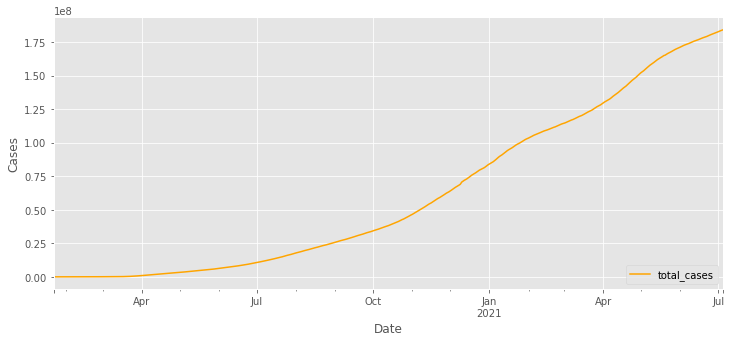

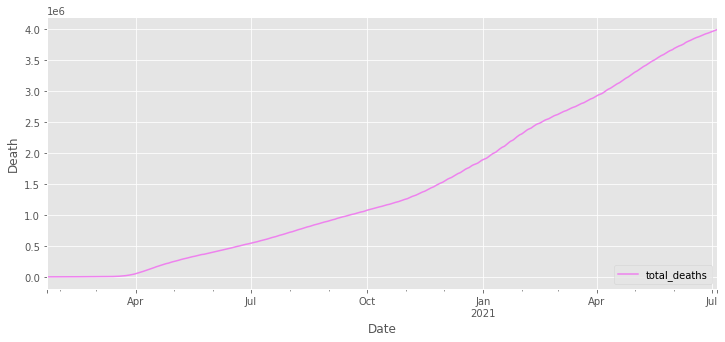

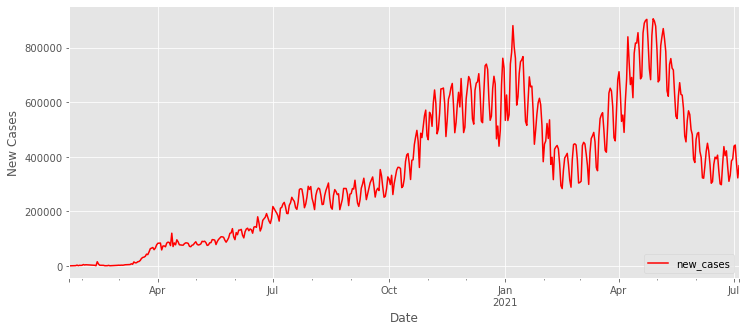

In [22]:
#Plot the graph
Data_For_Regression['total_cases'].plot(figsize=(12,5), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

Data_For_Regression['total_deaths'].plot(figsize=(12,5), color="violet")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Death')
plt.show()

Data_For_Regression['new_cases'].plot(figsize=(12,5), color="red")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()


<a id="subsection-5.3"></a>

* # Chosing 30 days as number of forecast days


In [23]:
# pick total death as forecast column
forecast_col = 'total_deaths'

# Chosing 30 days as number of forecast days
forecast_out = int(30)
print('length =',len(Data_For_Regression), "and forecast_out =", forecast_out)

length = 531 and forecast_out = 30


<a id="subsection-5.4"></a>

* # Creating label by shifting 'total_deaths' according to 'forecast_out'


In [24]:
# Creating label by shifting 'total_deaths' according to 'forecast_out'
Data_For_Regression['temp'] = Data_For_Regression[forecast_col].shift(-forecast_out)
print(Data_For_Regression.head(2))
print('\n')
# verify rows with NAN in Label column 
print(Data_For_Regression.tail(2))

           total_cases new_cases total_deaths new_deaths aged_65_older  \
date                                                                     
2020-01-22         557         0           17          0         8.696   
2020-01-23         655        98           18          1         8.696   

           aged_70_older gdp_per_capita diabetes_prevalence female_smokers  \
date                                                                         
2020-01-22         5.355        15469.2                8.51          6.434   
2020-01-23         5.355        15469.2                8.51          6.434   

           male_smokers hospital_beds_per_thousand  temp  
date                                                      
2020-01-22       34.635                      2.705  2252  
2020-01-23       34.635                      2.705  2459  


            total_cases new_cases total_deaths new_deaths aged_65_older  \
date                                                                      
20

<a id="subsection-5.5"></a>

* # Define features Matrix X

In [25]:
# Define features Matrix X by excluding the label column which we just created 
X = np.array(Data_For_Regression.drop(['temp'], 1))

# Using a feature in sklearn, preposessing to scale features
X = preprocessing.scale(X)
print(X[1,:])

[-1.02998905 -1.42878599 -1.19564546 -1.75967299  0.          0.
  0.          0.          0.          0.          0.        ]


In [26]:
# X contains last 'n= forecast_out' rows for which we don't have label data
# Put those rows in different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]

X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 30 & Length of X : 501


<a id="subsection-5.6"></a>

* # Define vector y

In [27]:
# Define vector y for the data we have prediction for
# make sure length of X and y are identical
y = np.array(Data_For_Regression['temp'])
y = y[:-forecast_out]
print('Length of y: ',len(y))

Length of y:  501


<a id="subsection-5.7"></a>

* # split into test and train data


In [28]:
# (split into test and train data)
# test_size = 0.2 ==> 20% data is test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('length of X_train and x_test: ', len(X_train), len(X_test))

length of X_train and x_test:  400 101


<a id="subsection-5.8"></a>

* # Accuracy

In [29]:
# Create linear regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)
# Test
accuracy = lr.score(X_test, y_test)
print("Accuracy of Linear Regression: ", accuracy)

Accuracy of Linear Regression:  0.9988384055563168


<a id="subsection-5.9"></a>

* # Predict using our Model


In [30]:
# Predict using our Model
forecast_prediction = lr.predict(X_forecast_out)
print(forecast_prediction)

[3980655.82022747 3995620.9236021  4034235.06660573 4059075.03358618
 4122383.15291083 4098271.90663976 4079983.99345131 4066993.92221826
 4067501.19686399 4113477.66072511 4129407.25901222 4129612.35919642
 4142017.35263071 4126962.5458318  4110669.38309326 4120720.76577433
 4162331.30793974 4193030.36254093 4186621.19960201 4204857.58528777
 4184731.73834152 4166274.19233597 4183674.58754063 4216106.2916809
 4234465.07865678 4251965.44692377 4257727.57209092 4237686.11163958
 4226895.41695737 4253664.48221833]


In [31]:
last_date = Data_For_Regression.iloc[-1].name 
last_date

Timestamp('2021-07-05 00:00:00')

In [32]:
todays_date = datetime.strptime(last_date.strftime("%Y-%m-%d"), "%Y-%m-%d")
todays_date = todays_date + timedelta(days=1)
todays_date = datetime.strptime(todays_date.strftime("%Y-%m-%d"), "%Y-%m-%d")
index = pd.date_range(todays_date, periods=30, freq='D')
columns = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths','aged_65_older','aged_70_older','gdp_per_capita','diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','temp','forecast']
temp_df = pd.DataFrame(index=index, columns=columns)
temp_df

,total_cases,new_cases,total_deaths,new_deaths,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,temp,forecast
2021-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
j=0
for i in forecast_prediction:
    temp_df.iat[j,12] = i
    j= j+1

temp_df

,total_cases,new_cases,total_deaths,new_deaths,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,temp,forecast
2021-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.98066e+06
2021-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.99562e+06
2021-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.03424e+06
2021-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.05908e+06
2021-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.12238e+06
2021-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.09827e+06
2021-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.07998e+06
2021-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.06699e+06
2021-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0675e+06
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.11348e+06


<a id="subsection-5.10"></a>

* # Plotting the Prediction

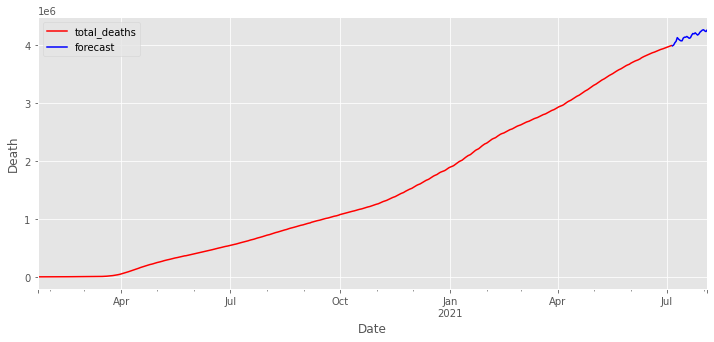

In [34]:
Data_For_Regression['total_deaths'].plot(figsize=(12,5), color="red")
temp_df['forecast'].plot(figsize=(12,5), color="blue")
plt.xlabel('Date')
plt.ylabel('Death')
plt.legend(loc="upper left")
plt.show()


 <a id="section-6"></a>
* # Prophet Model

In [35]:
owid_covid_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
owid_covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


<a id="subsection-6.1"></a>

* # Data Cleaning

In [36]:
Data_To_Process =pd.DataFrame(columns=['date','location', 'total_deaths','total_cases'], data=owid_covid_data[['date','location', 'total_deaths','total_cases']].values)
Data_To_Process.head()

,date,location,total_deaths,total_cases
0,2020-02-24,Afghanistan,NaN,1
1,2020-02-25,Afghanistan,NaN,1
2,2020-02-26,Afghanistan,NaN,1
3,2020-02-27,Afghanistan,NaN,1
4,2020-02-28,Afghanistan,NaN,1


<a id="subsection-6.2"></a>

* # Get Data for US




In [37]:
#Get data for US

Data_To_Process = Data_To_Process.query('location=="United States"' )
Data_To_Process.tail(10)

,date,location,total_deaths,total_cases
95713,2021-06-26,United States,603954,3.36215e+07
95714,2021-06-27,United States,604028,3.36254e+07
95715,2021-06-28,United States,604178,3.36405e+07
95716,2021-06-29,United States,604509,3.36521e+07
95717,2021-06-30,United States,604749,3.3665e+07
95718,2021-07-01,United States,605054,3.36794e+07
95719,2021-07-02,United States,605413,3.37091e+07
95720,2021-07-03,United States,605493,3.37139e+07
95721,2021-07-04,United States,605526,3.37176e+07
95722,2021-07-05,United States,605567,3.37231e+07


<a id="subsection-6.3"></a>

* # Predict Death Using Prophet


In [38]:
cases = Data_To_Process.groupby('date').sum()['total_cases'].reset_index()
deaths = Data_To_Process.groupby('date').sum()['total_deaths'].reset_index()

# ***  Prophet expect Dataframe with columns "ds" and "y" with the dates and values respectively 


In [39]:
#Clean the Data
# Prphet expect Dataframe with columns "ds" and "y" with the dates and values respectively
deaths.rename(columns={'Last_Update': 'date','total_deaths':'y'}, inplace=True)
deaths.columns = ['ds', 'y']
deaths.tail()

,ds,y
526,2021-07-01,605054.0
527,2021-07-02,605413.0
528,2021-07-03,605493.0
529,2021-07-04,605526.0
530,2021-07-05,605567.0


In [40]:
'''#Create the model using Prophet 0.95 confidence
ML_Model = Prophet(interval_width=0.95)
#Fit the Model
ML_Model.fit(deaths)
#Create prediction Data
Death_Prediction = ML_Model.make_future_dataframe(periods=60)
Death_Prediction.tail()
'''

'#Create the model using Prophet 0.95 confidence\nML_Model = Prophet(interval_width=0.95)\n#Fit the Model\nML_Model.fit(deaths)\n#Create prediction Data\nDeath_Prediction = ML_Model.make_future_dataframe(periods=60)\nDeath_Prediction.tail()\n'

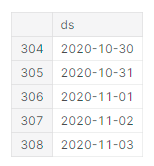

In [41]:
'''
#predicting the future with date, and upper and lower limit of y value
Death_Forecast = ML_Model.predict(Death_Prediction)
Death_Forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
'''

"\n#predicting the future with date, and upper and lower limit of y value\nDeath_Forecast = ML_Model.predict(Death_Prediction)\nDeath_Forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()\n"

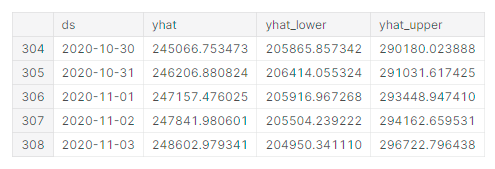

<a id="subsection-6.4"></a>

* # Plot - Death forecasting
Using prophet I have predicted the death for future with date, It also shows a upper and lower limit of y value, The blue line shows the prediction along with its lower and upper bound of the uncertainty interval. 

Death_forecasting = ML_Model.plot(Death_Forecast)
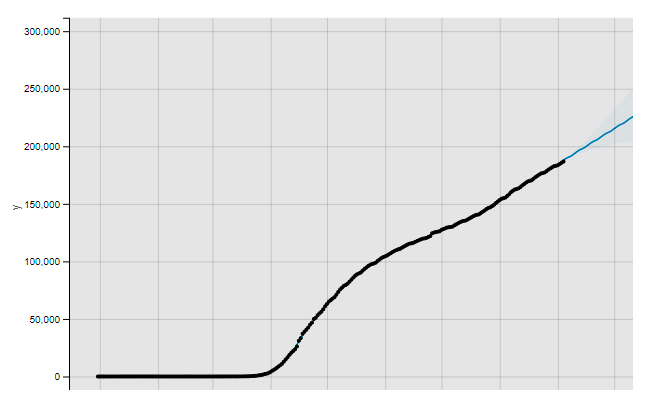


 <a id="section-7"></a>
# SIR Model

### References
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions#2.-SIR-model-

https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

https://www.youtube.com/watch?v=NKMHhm2Zbkw

https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html?fbclid=IwAR2t1lhNhmZOHB_DHf2Tvy3rDOjsr-W7uCJE8GaodRjmLv1oxjV5cKpZ4o8


SIR model is one of the simplest compartment model consist of three compartments S for the number of susceptible, I for the number of infectious, and R for the number of recovered or deceased.


N: total population

S(t): number of people susceptible on day t

I(t): number of people infected on day t

R(t): number of people recovered on day t

β(“beta”): expected amount of people an infected person infects per day

D: number of days an infected person has and can spread the disease

γ(“Gama”): the proportion of infected recovering per day (γ = 1/D)

R₀: the total number of people an infected person infects (R₀ = β / γ

These systems are extremely sensitive to the initial parameters. That’s also why it’s so hard to correctly model an emerging outbreak of a new disease.

In [42]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [43]:
# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [44]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

<a id="subsection-7.1"></a>
* # Plot - SIR Model

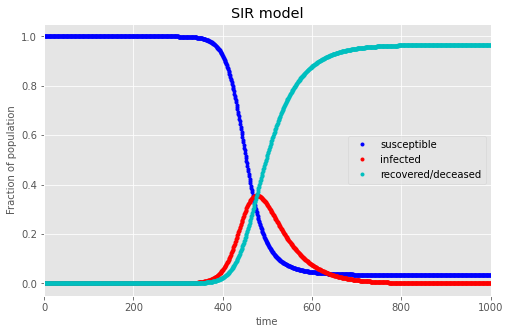

In [45]:
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()

<a id="section-8"></a>
# SEIHRD_Updated SIR_Model

 Created the extended SIR model (SIR Extended Model: This model extended SIR with Exposed, Hospitalized and Dead Compartments)


<a id="subsection-8.1"></a>
# * Data

In [46]:
TodaysData_Country = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv')

TodaysData_Country.head()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String,Delta_Deaths
0,Afghanistan,1/22/20,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4.0,AFG,2020/01/22,0.0
1,Afghanistan,1/23/20,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4.0,AFG,2020/01/23,0.0
2,Afghanistan,1/24/20,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4.0,AFG,2020/01/24,0.0
3,Afghanistan,1/25/20,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4.0,AFG,2020/01/25,0.0
4,Afghanistan,1/26/20,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4.0,AFG,2020/01/26,0.0


<a id="subsection-8.1"></a>
# * Data Cleaning

In [47]:
TodaysData_Country = TodaysData_Country[TodaysData_Country['Province_State'].isnull()]
TodaysData_Country = TodaysData_Country.query('Country_Region=="US"' )
ColumnToClean = ['Confirmed', 'Deaths', 'Recovered', 'Active']
# filling missing values 
TodaysData_Country[['Country_Region']] = TodaysData_Country[['Country_Region']].fillna('')
TodaysData_Country[ColumnToClean] = TodaysData_Country[ColumnToClean].fillna(0)
TodaysData_Country = TodaysData_Country.drop([ 'Country_Region','Last_Update','Delta_Recovered','Incident_Rate','People_Tested','People_Hospitalized','Province_State','FIPS','UID','iso3'], axis=1) 
#TodaysData_Country['Report_Date_String'] = pd.to_datetime(TodaysData_Country['Report_Date_String'],"%Y-%m-%d")
TodaysData_Country.head()

,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Report_Date_String,Delta_Deaths
96111,1,0,0.0,0.0,0.0,2020/01/22,0.0
96112,1,0,0.0,0.0,0.0,2020/01/23,0.0
96113,2,0,0.0,0.0,1.0,2020/01/24,0.0
96114,2,0,0.0,0.0,0.0,2020/01/25,0.0
96115,5,0,0.0,0.0,3.0,2020/01/26,0.0


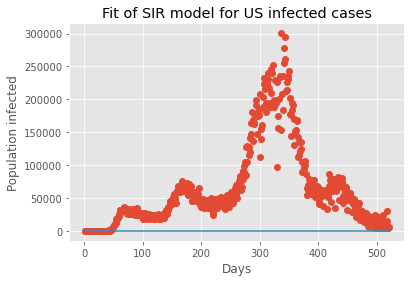

Optimal parameters: beta = 1.0  and gamma =  1.0


In [48]:
population = float(331002651) # US population
country_df = pd.DataFrame()
country_df['ConfirmedCases'] = TodaysData_Country.Confirmed.diff().fillna(0)
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for US infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

<a id="subsection-8.3"></a>

# * New Compartments
We need to add more compartments to make the model closer to real world.

Exposed - First compartment we need to add is exposed compartment. Since people need to be exposed to a infected person then only they will get infected. So now we need to consider SEIR model.

Dead – When we are modeling a deadly disease we need to account for death so we need to add a new compartment into our model.

Hospitalized - we need to consider the hospitalized compartment since lot factors related to this need to be added 

N: total population

S(t): number of people susceptible on day t

E(t): number of people exposed on day t

I(t): number of people infected on day t

R(t): number of people recovered on day t

D(t): number of people dead on day t

β: expected amount of people an infected person infects per day

D: number of days an infected person has and can spread the disease

γ: the proportion of infected recovering per day (γ = 1/D)

R₀: the total number of people an infected person infects (R₀ = β / γ)

δ: length of incubation period

α: fatality rate

ρ: rate at which people die (= 1/days from infected until death)

R₀_start (parameter in R₀(t))

R₀_end (parameter in R₀(t))

x₀ (parameter in R₀(t))

k (parameter in R₀(t))

s (parameter in Beds(t))

Beds₀ (parameter in R₀(t))

p(I→H): probability of going from infected to Hospitalized based on hospitalization rate

p(H→D): probability of dying in hospital based on mortality rate

In [49]:
owid_covid_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv',parse_dates=["date"], skiprows=[1])
owid_covid_data = owid_covid_data.query('location=="United States"' )
Data_To_Process =pd.DataFrame(columns=['date','deaths','cases'], data=owid_covid_data[['date', 'total_deaths','total_cases']].values)
Data_To_Process = Data_To_Process.sort_values(by='date', ascending=False)
Data_To_Process["deaths"] = Data_To_Process['deaths'].astype(str).astype(float)
data = Data_To_Process["deaths"].values[::-1]

In [50]:
# parameters
gamma = 1.0/9.0
sigma = 1.0/3.0
Predict_For = 30
#US Population
N = 331002647
#Data from OWID Data
beds_per_100k = 34.7

params_init_min_max = {"R_0_start": (3.0, 2.0, 5.0), "k": (2.5, 0.01, 5.0), "x0": (90, 0, 180), "R_0_end": (0.9, 0.3, 3.5),
                       "prob_I_to_H": (0.05, 0.01, 0.1), "prob_H_to_D": (0.5, 0.05, 0.8),
                       "s": (0.003, 0.001, 0.01)}  # form: {parameter: (initial guess, minimum value, max value)}

In [51]:
def Calculate_SEIHRD(y, t, beta, gamma, sigma, N, p_I_to_C, p_C_to_D, Hospital_Beds):
    S, E, I, H, R, D = y

    suspected = -beta(t) * I * S / N
    exposed = beta(t) * I * S / N - sigma * E
    infected = sigma * E - 1/12.0 * p_I_to_C * I - gamma * (1 - p_I_to_C) * I
    hosipitalized = 1/12.0 * p_I_to_C * I - 1/7.5 * p_C_to_D * min(Hospital_Beds(t), H) - max(0, H-Hospital_Beds(t)) - (1 - p_C_to_D) * 1/6.5 * min(Hospital_Beds(t), H)
    Recovered = gamma * (1 - p_I_to_C) * I + (1 - p_C_to_D) * 1/6.5 * min(Hospital_Beds(t), H)
    Death = 1/7.5 * p_C_to_D * min(Hospital_Beds(t), H) + max(0, H-Hospital_Beds(t))
    return suspected, exposed, infected, hosipitalized, Recovered, Death

In [52]:
def logistic_R_0(t, R_0_start, k, x0, R_0_end):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

In [53]:
def SEIHRDModel(days, beds_per_100k, R_0_start, k, x0, R_0_end, prob_I_to_H, prob_H_to_D, s):

    def beta(t):
        return logistic_R_0(t, R_0_start, k, x0, R_0_end) * gamma
  
    
    def Hospital_Beds(t):
        beds_0 = beds_per_100k / 100_000 * N
        return beds_0 + s*beds_0*t  # 0.003

    y0 = N-1.0, 1.0, 0.0, 0.0, 0.0, 0.0
    t = np.linspace(0, days-1, days)
    #Solve Differential Equations with ODEINT
    ret = odeint(Calculate_SEIHRD, y0, t, args=(beta, gamma, sigma, N, prob_I_to_H, prob_H_to_D, Hospital_Beds))
    S, E, I, H, R, D = ret.T
    R_0_over_time = [beta(i)/gamma for i in range(len(t))]

    return t, S, E, I, H, R, D, R_0_over_time, Hospital_Beds, prob_I_to_H, prob_H_to_D

In [54]:
days = Predict_For + len(data)
y_data = np.concatenate((np.zeros(Predict_For), data))

x_data = np.linspace(0, days - 1, days, dtype=int)  # x_data is just [0, 1, ..., max_days] array

In [55]:
def fitter(x, R_0_start, k, x0, R_0_end, prob_I_to_H, prob_H_to_D, s):
    ret = SEIHRDModel(days, beds_per_100k, R_0_start, k, x0, R_0_end, prob_I_to_H, prob_H_to_D, s)
    return ret[6][x]

<a id="subsection-8.4"></a>
# * Plot - SEIHRD Model


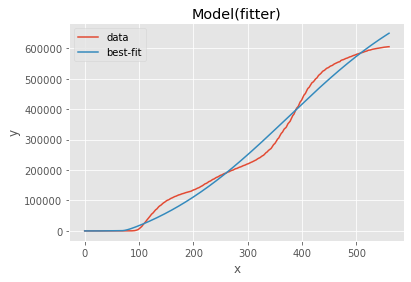

In [56]:
mod = lmfit.Model(fitter)
#The special syntax kwargs in function definitions in python is used to pass a keyworded, variable-length argument list.
for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

params = mod.make_params()
fit_method = "leastsq"
result = mod.fit(y_data, params, method="least_squares", x=x_data, nan_policy='omit')
result.plot_fit(datafmt="-");

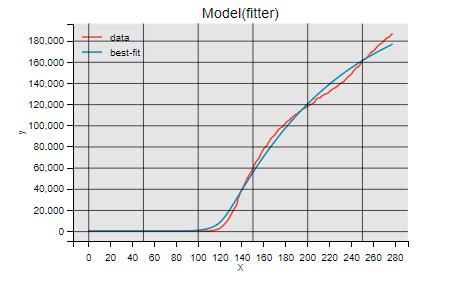